Take a binary image and a structuring element to perform the following morphological 
operations –  
(a)  Erosion and Dilation operations

Import Modules

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def display(img_set,img_title, row, col):
    n = len(img_set)
    plt.figure(figsize=(15,6))
    for i in range(n):
        plt.subplot(row,col,i+1)
        plt.title(img_title[i])
        plt.imshow(img_set[i],cmap='gray')
    plt.tight_layout()
    plt.show()

Take Binary_Image

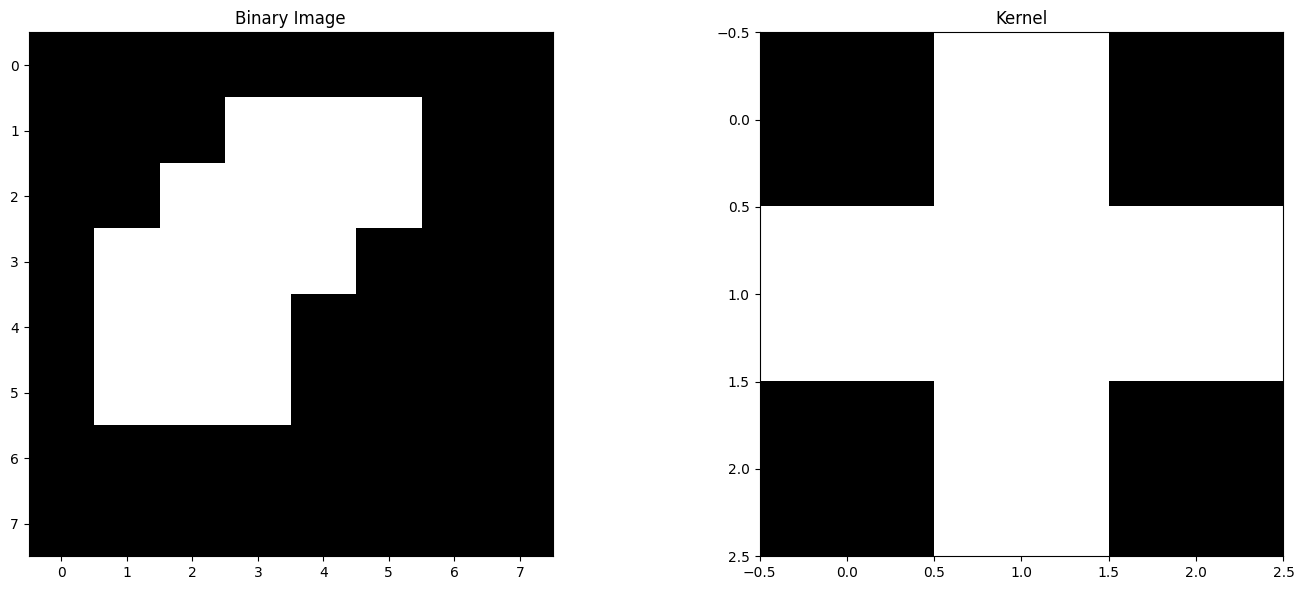

In [42]:
binary_image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]])

# Display the image and kernel
img_set = [binary_image, kernel]
img_title = ['Binary Image', 'Kernel']
display(img_set, img_title, 1, 2)

A. Perform Erosion and Dilation

In [43]:
def perform_erode(binary_image, kernel):
    half_kernel_h, half_kernel_w = kernel.shape[0]//2, kernel.shape[1]//2
    padded_img = np.pad(binary_image, ((half_kernel_h,half_kernel_h), (half_kernel_w,half_kernel_w)), mode='constant', constant_values=0)
    eroded_img = np.zeros_like(binary_image, dtype=np.uint8)

    for i in range(half_kernel_h,padded_img.shape[0]-half_kernel_h):
        for j in range(half_kernel_w, padded_img.shape[1]-half_kernel_w):
            region = padded_img[i-half_kernel_h:i+half_kernel_h+1, j-half_kernel_w:j+half_kernel_w+1]
            # if kernel fits in region
            if np.all(region & kernel == kernel):
                eroded_img[i-half_kernel_h,j-half_kernel_w] = 1
    return eroded_img


def perform_dilation(binary_image, kernel):
    half_kernel_h, half_kernel_w = kernel.shape[0]//2, kernel.shape[1]//2
    padded_img = np.pad(binary_image, ((half_kernel_h,half_kernel_h),(half_kernel_w,half_kernel_w)), mode='constant', constant_values=0)
    dilated_img = np.zeros_like(binary_image, dtype=np.uint8)

    for i in range(half_kernel_h, padded_img.shape[0]-half_kernel_h):
        for j in range(half_kernel_w, padded_img.shape[1]-half_kernel_w):
            region = padded_img[i-half_kernel_h:i+half_kernel_h+1, j-half_kernel_w:j+half_kernel_w+1]
            # if kernel hit region
            if np.any(region & kernel):
                dilated_img[i-half_kernel_h, j-half_kernel_w] = 1
    return dilated_img        

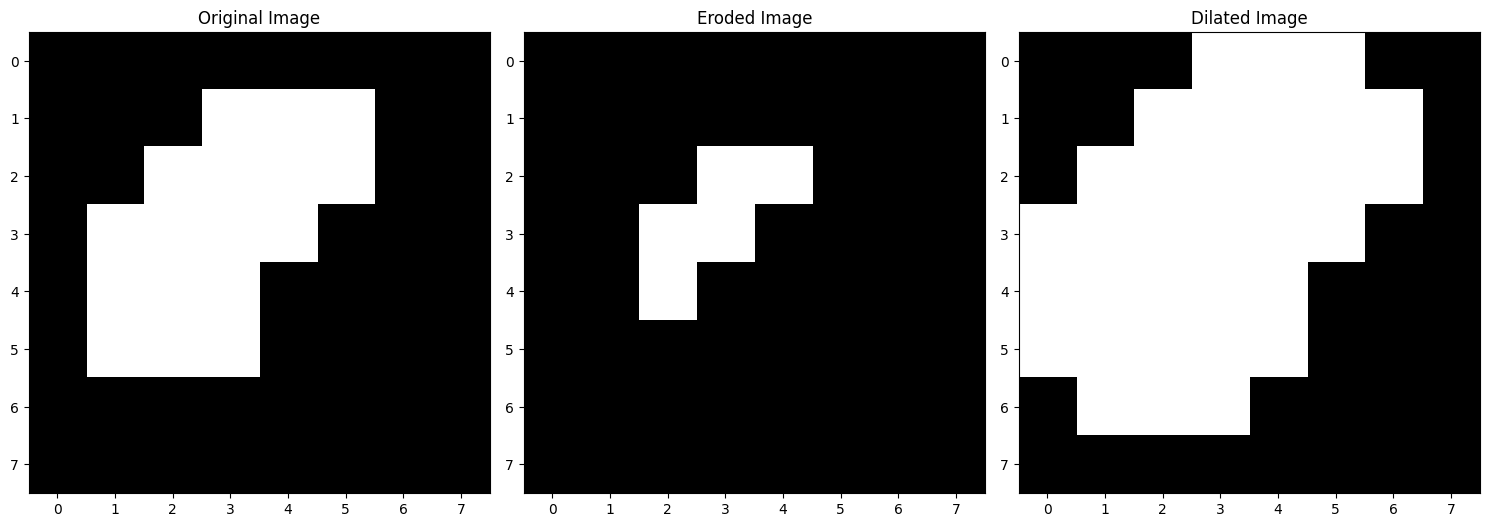

In [44]:
eroded_img = perform_erode(binary_image, kernel)
dilated_img = perform_dilation(binary_image, kernel)

#Display original, eroded and dilated images
img_set = [binary_image, eroded_img, dilated_img]
img_title = ['Original Image', 'Eroded Image', 'Dilated Image']
display(img_set, img_title, 1, 3)

# print(eroded_img)
# print(dilated_img)

B.  Opening and Closing operations

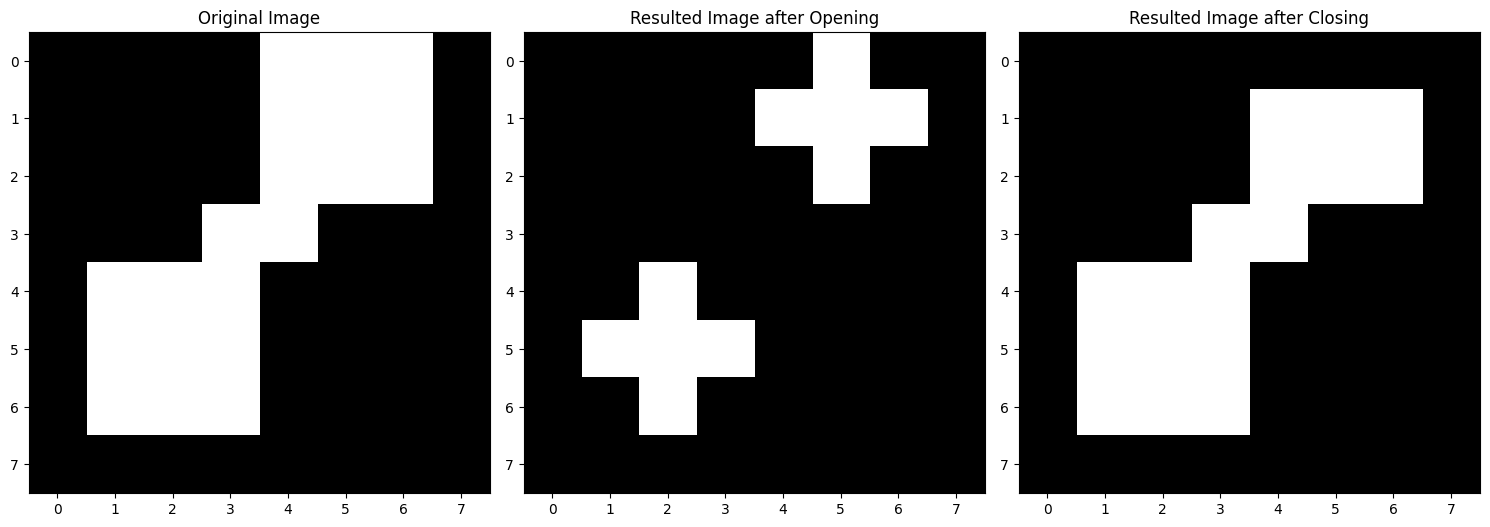

In [39]:
binary_image = np.array([
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]], dtype=np.uint8)

# Perform Opening operation
result_img_after_opening = perform_erode(binary_image, kernel)
result_img_after_opening = perform_dilation(result_img_after_opening, kernel)

# Perform Closing operation
result_img_after_closing = perform_dilation(binary_image, kernel)
result_img_after_closing = perform_erode(result_img_after_closing, kernel)

#Display the Resulted img after performing Opening and closing operation
img_set = [binary_image, result_img_after_opening, result_img_after_closing]
img_title = ['Original Image', 'Resulted Image after Opening', 'Resulted Image after Closing']
display(img_set, img_title, 1, 3)

#pritn(result_img_after_opening)
# print(result_img_after_closing)

C. Boundary extraction using morphological operation

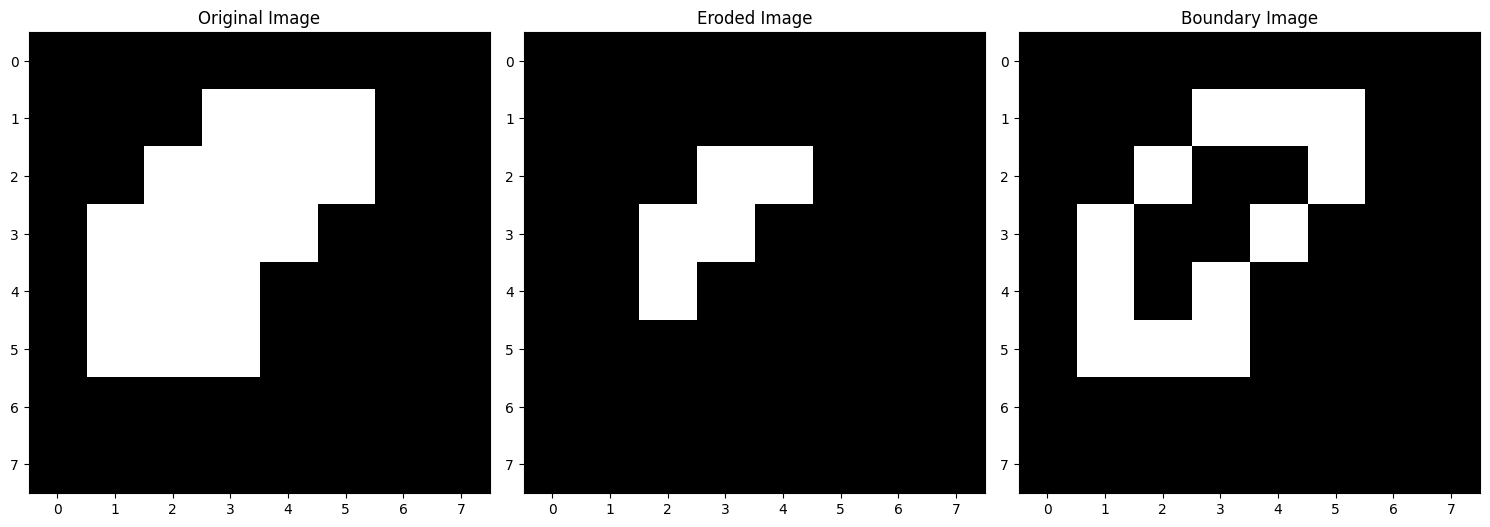

In [48]:
binary_image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]])

# Perform Boundary Extraction
eroded_img = perform_erode(binary_image, kernel)
boundary_img = cv2.subtract(binary_image, eroded_img)

# Display the boundary image
img_set = [binary_image, eroded_img, boundary_img]
img_title = ['Original Image', 'Eroded Image', 'Boundary Image']
display(img_set, img_title, 1, 3)

D.  Implement the region filling algorithm with morphological operation 

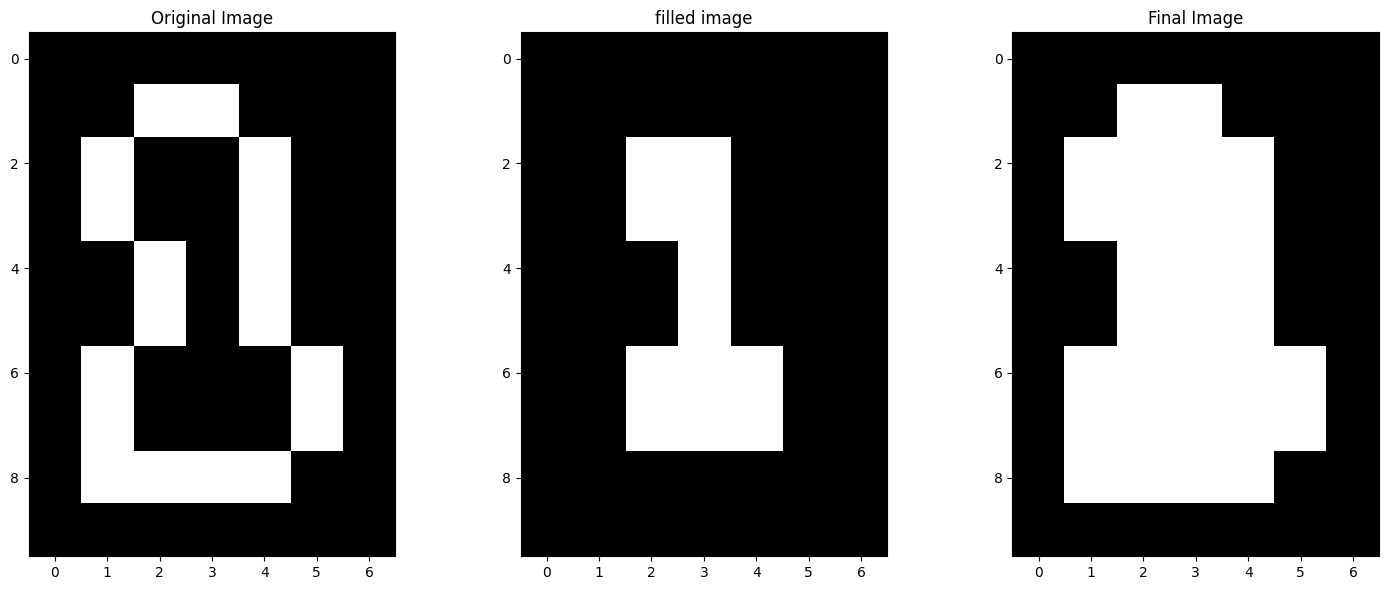

In [115]:
def region_filling_op(binary_image, kernel):
    cur_img = np.zeros_like(binary_image,dtype=np.uint8)
    prev_img = np.zeros_like(binary_image,dtype=np.uint8)
    complement_img = cv2.bitwise_not(binary_image)

    # starting point inside the boundary
    cur_img[2,2]=1

    while not np.array_equal(cur_img,prev_img):
        prev_img = cur_img
        delited_img = perform_dilation(cur_img,kernel)
        cur_img = cv2.bitwise_and(delited_img, complement_img)
    
    return cur_img



binary_image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)

kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]], dtype=np.uint8)

filled_region = region_filling_op(binary_image, kernel)

final_img = cv2.bitwise_or(filled_region,binary_image)

# Display the original image and the filled region
img_set = [binary_image, filled_region, final_img]
img_title = ['Original Image', 'filled image', 'Final Image']
display(img_set, img_title, 1, 3)